First, we need to import the libraries needed to have access to functions.py and various other libraries

In [ ]:
import sys
import os
from sklearn.model_selection import train_test_split # we will use this to break into dev and val datasets

We append our to working path the ../src path, where functions.py lies

In [7]:

# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-2 path
ass_path=sys.path[-2]

print(ass_path)

/home/sdi1700187/MLCBAss2/Assignment-2


We import everything from functions.py. Also the first two line ensure that everytime we change something to functions.py, this change can be "seen" here

In [8]:
%load_ext autoreload
%autoreload 2

from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will split the breast_cancer.csv dataset into two datasets, dev and val. We will use the dev to perform repeated nested cross validation and we will use the val dataset to evaluate the final winner model. The dev dataset WILL NOT be cleaned beforehand, in order to avoid data leakage, while the val dataset will be cleaned

In [9]:
df=pd.read_csv('../data/breast_cancer.csv')
print(df)

dev_df,val_df=train_test_split(df,train_size=0.8,test_size=0.2)

val_df=clean_data(val_df)
print(val_df)

val_df.to_csv('../data/val_clean_breast_cancer.csv',index=False)
dev_df.to_csv('../data/dev_breast_cancer.csv',index=False)

      id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      1         M        14.68         20.13           94.74      684.5   
1      2         B        11.50         18.45           73.28      407.4   
2      3         M        15.85         23.95          103.70      782.7   
3      4         M        18.82         21.97          123.70     1110.0   
4      5         B        12.95         16.02           83.14      513.7   
..   ...       ...          ...           ...             ...        ...   
507  508         B        13.00         25.13           82.61      520.2   
508  509         B        14.20         20.53           92.41        NaN   
509  510         M        13.86         16.93           90.96      578.9   
510  511         M        17.30         17.08          113.00      928.2   
511  512         M        23.27         22.04          152.10     1686.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0       

we will perform a bit of data exploration by getting the datatypes of each feature, getting to know the shape of our dataset (entries and number of different columns/features), discovering how many missing values and duplicates we have, getting an idea about the class imbalance and finding how many outliers we have. After that, we will add the missing values (NAs), we will remove the duplicates and we WON'T remove the outliers, as they are a significant part of our dataset. We also explore the correlation of the features and the target. We find out that we could only keep 15 out of them, the most correlated, but since our dimensionality is not that high, we will NOT move towards that direction

Shape of dataset: (512, 32) (512 entries and 32 columns)
Data type of the 32 columns
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoo

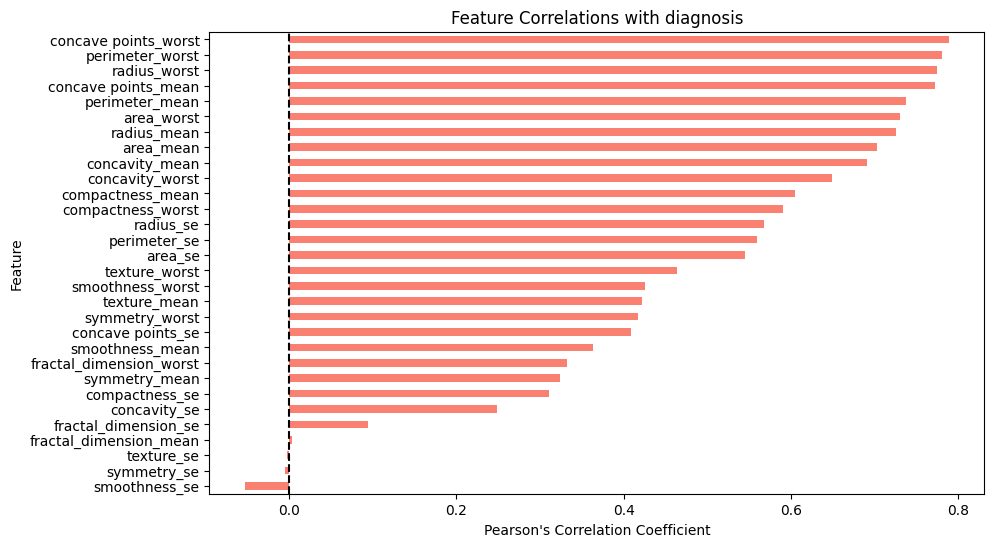

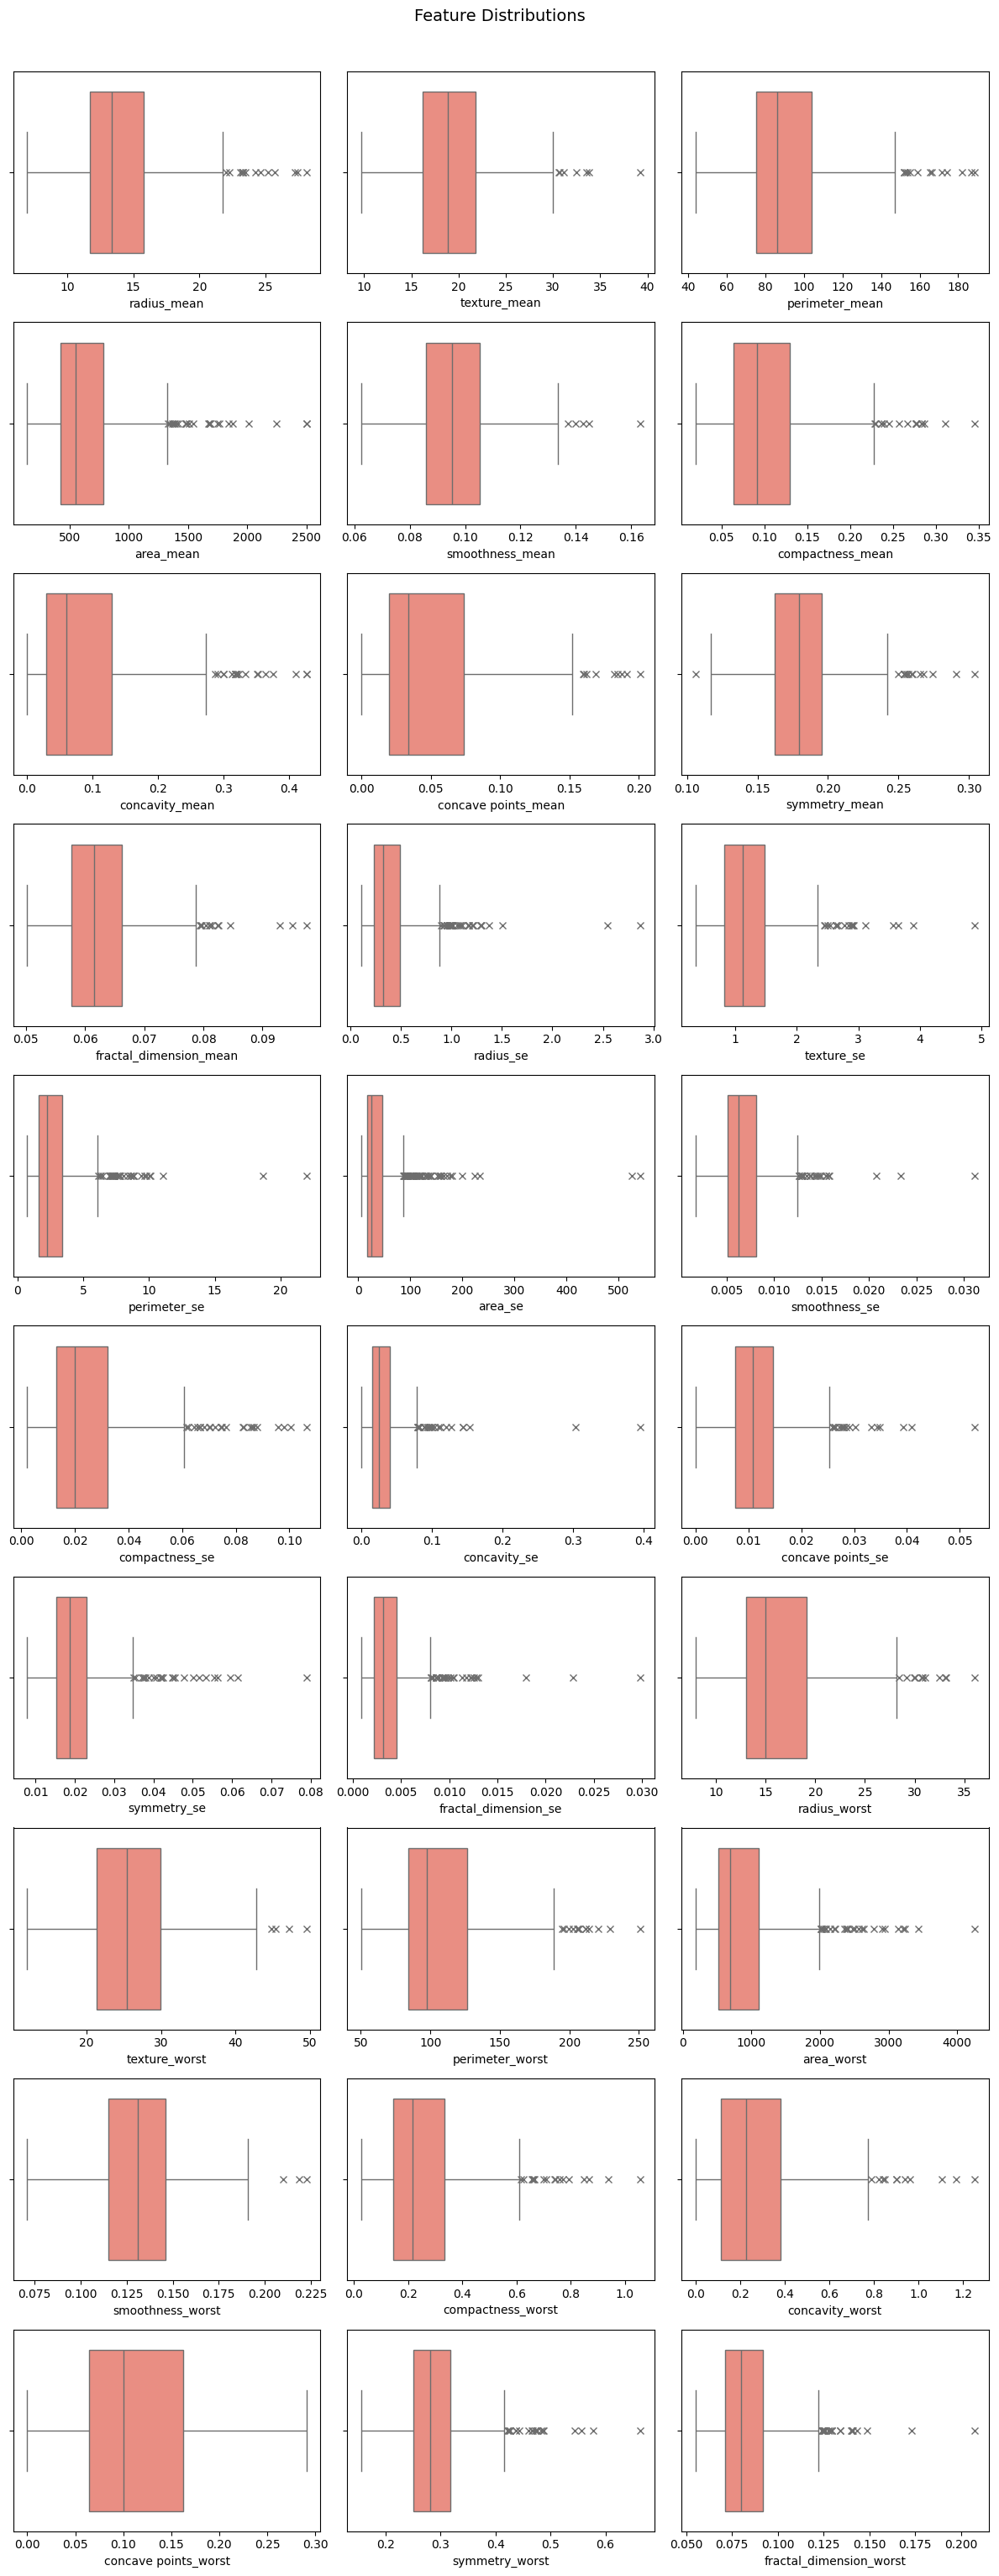

In [10]:
df=clean_data(df)
corr_between_target(data_df=df,thres=0.5)
boxpolt_distro(data_df=df)

Next, we check for the correlation between Features, with the idea being that we could drop the most correlated features. If we follow, this approach, we could end up with just 15 features out of 30. Still, we gather that it would NOT be in our best interest to drop half the features, especially in such a delicate task as tumor classification

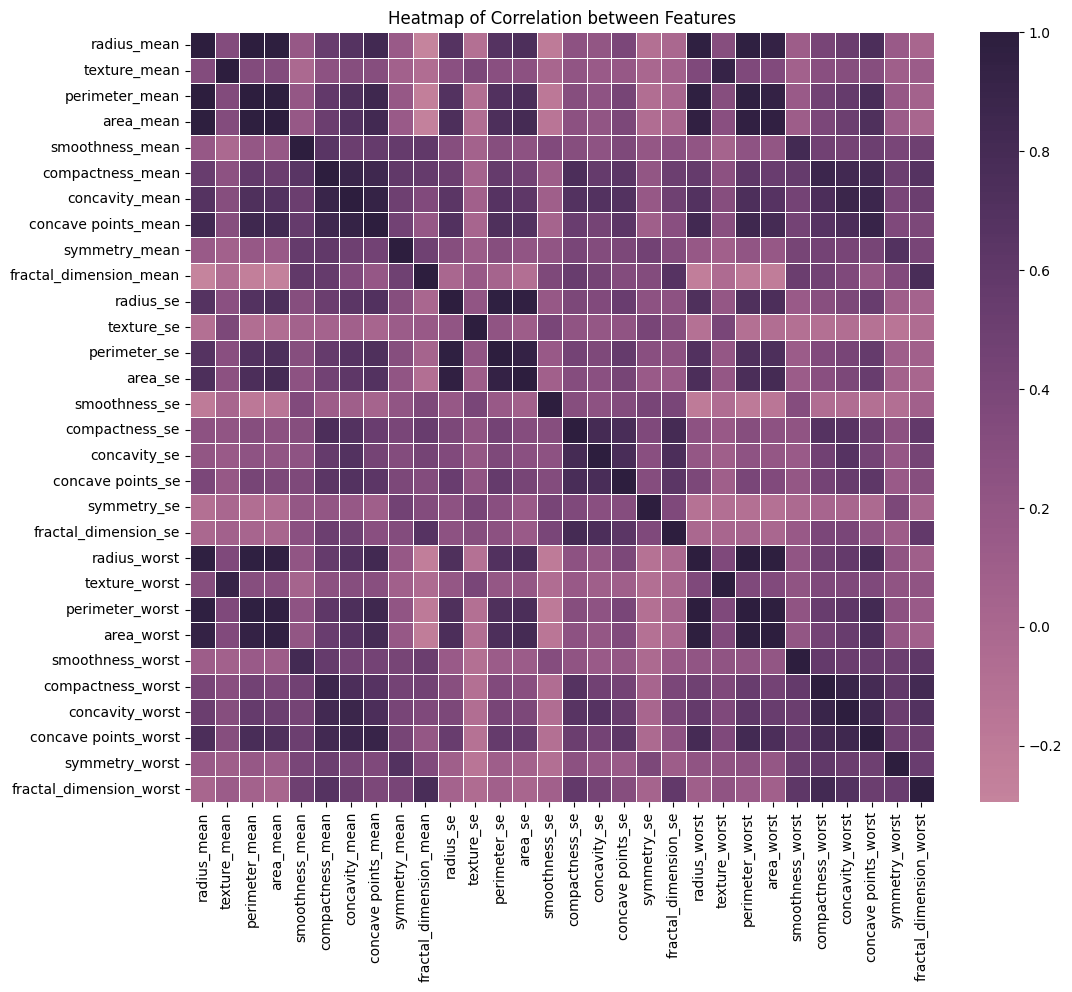

Pairs of high correlation
radius_mean          perimeter_mean             0.997843
radius_worst         perimeter_worst            0.993542
radius_mean          area_mean                  0.987143
perimeter_mean       area_mean                  0.986208
radius_worst         area_worst                 0.983613
perimeter_worst      area_worst                 0.976923
radius_se            perimeter_se               0.973574
perimeter_mean       perimeter_worst            0.970026
radius_mean          radius_worst               0.969159
perimeter_mean       radius_worst               0.968992
radius_mean          perimeter_worst            0.964738
area_mean            radius_worst               0.961751
                     area_worst                 0.958536
                     perimeter_worst            0.958105
radius_se            area_se                    0.952440
perimeter_mean       area_worst                 0.940703
radius_mean          area_worst                 0.940529
perim

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [11]:
corr_between_features(data_df=df)

Finally, we perform PCA in order to find out how many components can explain 95% of the variance. We discover that 9 components suffice for such a task. Once again, however, we opt to keep all of the features and perform any dimensionality reduction. We are of the opinion, that in such a delicate problem, every feature matters. What we do see however, is that the 2 classes are separeble, by plotting just the two Principal Components. Keep in mind that class 1 corresponds to Malignant, while class 0 corresponds to Benign

95.0% of the variance can be explained by 9 components
The explained variance ratio is:  [0.46567768 0.18754454 0.09609654 0.06230275 0.05473076 0.03930354
 0.02226994 0.01497114 0.01305384]


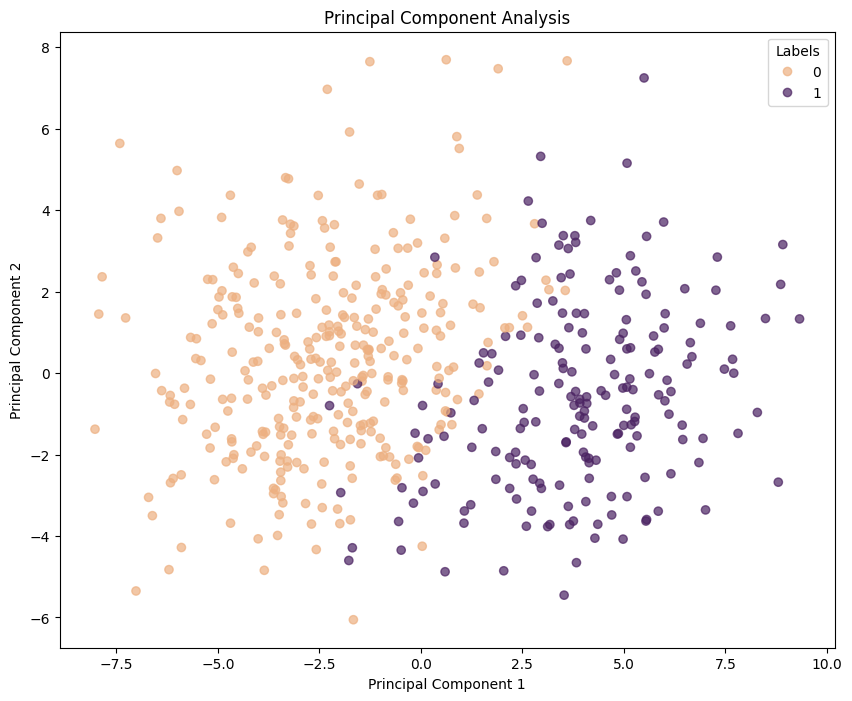

,0,1,2,3,4,5,6,7,8,diagnosis
0,1.256263,-1.822438,-0.089947,0.766374,0.962881,-1.170559,0.064210,0.226085,-0.641560,1
1,-3.126415,-0.682337,0.883083,-0.843952,1.421741,0.325402,-0.267337,0.172955,-1.003717,0
2,1.513643,-1.365614,2.235332,-0.451769,-0.564433,1.269495,-1.981943,1.126592,0.199439,1
3,5.073439,-0.345900,1.803134,0.003560,0.201283,0.129251,-0.134462,0.031397,0.459688,1
4,-0.861223,1.919123,-1.518658,-0.810593,0.123823,0.216000,-0.480767,0.875434,1.495767,0
...,...,...,...,...,...,...,...,...,...,...
507,-3.626216,-2.959753,0.829718,1.746089,0.697198,-1.072410,-0.574948,-0.047538,-0.491662,0
508,0.765372,-1.266059,-0.179455,0.537734,-1.539455,0.148235,0.491840,-0.285590,-0.335631,0
509,2.336500,2.143400,-1.560013,0.411916,-0.082820,0.772467,-0.186440,-0.467248,0.256689,1
510,2.188639,-2.073046,-1.737988,-0.334440,0.534794,-0.238283,-0.641724,-0.324509,-0.198610,1


In [12]:
perform_pca(data_df=df)